<a href="https://colab.research.google.com/github/comptech-winter-school/covid19-prediction/blob/visualization/Create_Vizual_Ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd

In [127]:
Country="Russia"
ALL_DATA = "https://raw.githubusercontent.com/AntonioWanderer/covid19-prediction/visualization/graph.csv"
COORDS="https://raw.githubusercontent.com/comptech-winter-school/covid19-prediction/visualization/coords.csv"

In [128]:
df=pd.read_csv(ALL_DATA, error_bad_lines=False,sep=";")
coords=pd.read_csv(COORDS)
df.head()

,Country1,Country2,Lag,Degree_of_certainty
0,Afghanistan,Albania,-100,0.329855
1,Afghanistan,Algeria,38,0.754405
2,Afghanistan,Argentina,-29,0.663128
3,Afghanistan,Armenia,99,0.265069
4,Afghanistan,Australia,99,-0.063636


In [101]:
coords.head()

,Unnamed: 0,Country_Region,Confirmed,Lat,Long_
0,0,Afghanistan,160692.0,33.93911,67.709953
1,1,Albania,251015.0,41.15330,20.168300
2,2,Algeria,243568.0,28.03390,1.659600
3,3,Andorra,35028.0,42.50630,1.521800
4,4,Angola,97812.0,-11.20270,17.873900


In [102]:
countries1 = df.merge(coords, left_on="Country1", right_on="Country_Region", how="inner").drop(["Confirmed", "Country_Region","Unnamed: 0"], axis=1)
rus1=countries1[countries1["Country2"] == Country]
rus1.head()

,Country1,Country2,Lag,Degree_of_certainty,Lat,Long_
90,Afghanistan,Russia,99,0.144013,33.93911,67.709953
206,Albania,Russia,-60,0.723340,41.15330,20.168300
321,Algeria,Russia,99,0.482765,28.03390,1.659600
435,Argentina,Russia,99,0.442892,-38.41610,-63.616700
548,Armenia,Russia,24,0.583083,40.06910,45.038200


In [103]:
countries2 = df.merge(coords, left_on="Country2", right_on="Country_Region", how="inner").drop(["Confirmed", "Country_Region","Unnamed: 0"], axis=1)
rus2=countries2[countries2["Country1"] == Country]
rus2.head()

,Country1,Country2,Lag,Degree_of_certainty,Lat,Long_
4277,Russia,Rwanda,-100,0.658055,-1.940300,29.873900
4369,Russia,Saudi Arabia,-100,-0.135410,23.885942,45.079162
4462,Russia,Serbia,-21,0.625687,44.016500,21.005900
4556,Russia,Singapore,-17,0.620307,1.283300,103.833300
4651,Russia,Slovakia,23,0.784416,48.669000,19.699000


In [104]:
rus1.rename(columns={'Country1':'Country','Country2':'Main'},inplace=True)
rus2.rename(columns={'Country2':'Country','Country1':'Main'},inplace=True)
Country_list=pd.concat([rus1,rus2],axis=0)
Country_list.sample(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Main,Lag,Degree_of_certainty,Lat,Long_
6096,Netherlands,Russia,-24,0.697652,41.356705,-15.140347
4598,Ireland,Russia,-57,0.649205,53.142400,-7.692100
1926,Burma,Russia,91,0.660318,21.916200,95.956000
2123,Cameroon,Russia,-100,0.663974,3.848000,11.502100
4248,Hungary,Russia,-100,0.563233,47.162500,19.503300
4556,Singapore,Russia,-17,0.620307,1.283300,103.833300
6380,Peru,Russia,-100,0.359881,-10.630983,-75.276593
2505,Colombia,Russia,99,0.307143,5.349119,-74.192427
3221,Ecuador,Russia,-100,0.234791,-1.831200,-78.183400
4796,Jamaica,Russia,-69,0.622895,18.109600,-77.297500


In [105]:
Country_list.loc[Country_list['Degree_of_certainty'] < 0,'Degree_of_certainty'] = 0

Country_list['Degree_of_certainty'] = (Country_list['Degree_of_certainty']*9 + 1).apply(round)
Country_list['Degree_of_certainty'].sample(5)

6470    6
2123    7
1205    8
2505    4
6646    4
Name: Degree_of_certainty, dtype: int64

In [106]:
Country_list['Degree_of_certainty'].value_counts()

7    28
6    24
8    19
5    18
4    13
3     8
9     5
2     1
1     1
Name: Degree_of_certainty, dtype: int64

In [109]:
Country_list.rename(columns={'Country':'Cтрана','Lag':'Отставание/опережение (дней)','Degree_of_certainty':'Степень уверенности (из 10)'},inplace=True)

In [117]:
Country_list.sample(5)

,Cтрана,Main,Отставание/опережение (дней),Степень уверенности (из 10),Lat,Long_,Координата
4369,Saudi Arabia,Russia,-100,1,23.885942,45.079162,23.885942
6173,North Macedonia,Russia,-60,4,41.608600,21.745300,41.608600
2025,Cambodia,Russia,99,7,11.550000,104.916700,11.550000
5841,Mongolia,Russia,56,7,46.862500,103.846700,46.862500
4462,Serbia,Russia,-21,7,44.016500,21.005900,44.016500


In [110]:
Country_list.to_csv('Russia_relations.csv')

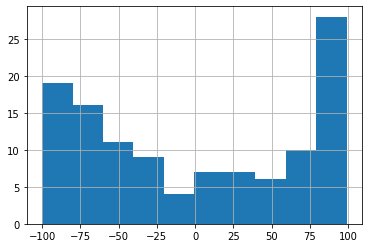

In [93]:
Country_list['Lag'].hist()